In [1]:
# -*- coding: utf-8 -*-
from underthesea import word_tokenize
import re
import VietnameseTextNormalizer.ReleasePython3.VietnameseTextNormalizer as nm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# 1. Loading and exploring the dataset

## 1.1. Loading the dataset

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
dataset = pd.read_csv("uit-posts-dataset.csv")
dataset

,label,text
0,1,[TSSĐH]-THÔNG BÁO TỔ CHỨC LỚP ÔN TẬP CHUẨN BỊ TUYỂN SINH CHƯƠNG TRÌNH ĐÀO TẠO TRÌNH ĐỘ THẠC SĨ ĐỢT 2 NĂM 2020.\nChi tiết mời các bạn xem tại: https://sdh.uit.edu.vn/…/thong-bao-ve-viec-chuc-tap-phuc-vu…
1,1,"💗💗 Giao lưu cùng Nhà báo- Nhà thơ Nguyễn Phong Việt 💗💗\n🎈🎈 Phòng Công tác Sinh viên thân mời các bạn sinh viên tham dự chương trình giao lưu cùng phóng viên, nhà thơ, tác giả sách Nguyễn Phong Việt với chủ đề ""KHI BẠN HỌC MỘT NGHỀ RỒI LÀM NGHỀ MÌNH KHÔNG HỌC"""
2,1,Phòng Công tác Sinh viên thông tin đến sinh viên về thời gian làm việc của Không gian chia sẻ như sau:\nTại Phòng Không gian chia sẻ\n- Thứ 2: từ 08:30 - 15:00...\nXem thêm
3,1,🔬 Các chuyên ngành đào tạo trường Đại học Kansai tại Osaka\n💰 Học phí và học bổng\n❓ Điều kiện tuyển sinh trường Đại học Kansai tại Osaka\n💯 Tất cả thông tin trên xem chi tiết tại link: https://echigo.edu.vn/gioi-thieu-doi-net-ve-truong-dai-hoc…/...\nXem thêm
4,1,"👉 Bật mí với các bạn một chương trình vô cùng hấp dẫn sắp diễn ra, do Nhà Văn hoá Sinh viên phối hợp với Trường ĐH CNTT - ĐHQG TP.HCM tổ chức, hứa hẹn sẽ đem lại cho các bạn sinh viên một buổi tối vô cùng thoả mái sau những giờ học căng thẳng 😁😁\n🌀 Mời tất cả các bạn đến với ""Thanh âm Việt"" lúc 17h, thứ 5 ngày 18/6/2020 tại Giảng đường 1, Trường ĐH CNTT nhé!"
...,...,...
9089,1,Bạn này vừa đến Trường nộp Giấy kết quả thi THPT Quốc gia 2019 để xác nhận nhập học\nVà hoàn thành luôn thủ tục nhập học (nộp học phí và hồ sơ nhập học)
9090,1,Các em nhỏ nhớ đi MHX2020 nha\nChị share để kiểu khai trương group mới .-.\nShare mấy group kia chán òi :>
9091,3,# chào mình đỗ ktpm clc ... bác nào chung khoa làm quen\nƠ mà cái maill edu của trường cấp k giới hạn dung lượng gg drive à.
9092,1,"Chào các bạn, phòng Công tác Sinh viên đã đăng tải hướng dẫn dành cho Tân sinh viên Khóa 2019 tại Forum Trường. Các bạn xem tại đây nha!\nhttps://forum.uit.edu.vn/node/48?fbclid=IwAR1v5RCKNpClPA8bLxg7kquIfrtul7f4IdLA8XvO6pFBHhl4aYP79p4PFAU"


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9094 entries, 0 to 9093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   9094 non-null   int64 
 1   text    9094 non-null   object
dtypes: int64(1), object(1)
memory usage: 142.2+ KB


## 1.2. Class distribution

In [5]:
dataset["label"].value_counts()

1    3813
3    2439
4    2173
2     669
Name: label, dtype: int64

Text(0.5, 1.0, 'dataset')

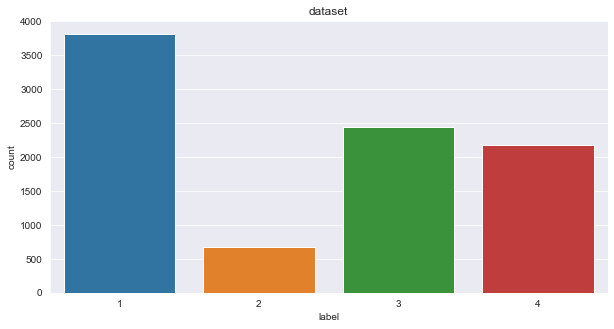

In [6]:
%matplotlib inline
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(dataset["label"],ax=axes).set_title('dataset')

1. **Thông báo**: các thông báo của trường, của khoa, của các câu lạc bộ, của lớp (thông báo mở lớp); thông báo về học bổng.
2. **Tìm đồ thất lạc**: viết về việc thất lạc đồ hoặc tìm thấy đồ thất lạc.
3. **Thắc mắc, nhờ giúp đỡ** (chủ yếu liên quan đến vấn đề cá nhân): hỏi về trường, nhờ điền form khảo sát, nhờ điền form đăng kí mở lớp, bán lại đồ dùng, thiếu tín chỉ,...
4. **Khác**: các hoạt động của cơ quan, tổ chức bên ngoài như tuyển dụng, quảng cáo khóa học, chương trình bốc thăm, ngày hội công nghệ, tham quan doanh nghiệp,...; các bài không rõ chủ đề hoặc nội dung không đáng quan tâm. 

## 1.3. Taking a look at samples from each classes

In [7]:
thongbao = dataset[dataset['label'].iloc[:] == 1].copy(deep=True)
thongbao.sample(10)

,label,text
7042,1,"LĂN TĂN, THẮC MẮC - ĐẾN VỚI HỘI NGHỊ SINH VIÊN <3\n#HNSV2019 #ISE #KHKTTT"
4082,1,Tài liệu training Kiến trúc máy tính hôm nay nè nha mọi người!! ^^\nChúc các bạn thi thiệt tốt nhé !! ^_^
972,1,<3 Mai bắt đầu hiến máu rồi nè mọi người ơi <3
3061,1,"Các bạn sinh viên hay đón tuyến xe buýt 52, 30 lưu ý!\nTừ hôm nay, ngày 16/9/2019, trạm xe buýt 52 và 30 sẽ được di dời từ Trường Đại học Quốc Tế ra trạm xe buýt Khu A nhằm đảm bảo an toàn đi lại của sinh viên trong khuôn viên Trường Đại học Quốc Tế trong thời gian thi công tòa nhà khối văn phòng của trường.\nVị trí đón và trả sinh viên mới của 2 tuyến xe buýt trên là:...\nXem thêm"
8307,1,Hoàng hôn ở khu quân sự đẹp hông mn 😍\nTham gia NETSEC Escape để được ngắm hoàng hôn đẹp như này nha =)))))))\nChỉ với 20k thôi nha mn ơiiiiiii 😘😘\nLink đăng kí : bitly.com/DangKy_NETSEC_ESCAPE\n#NETSEC_ESCAPE #LCH_MMTTT
7235,1,FIRE III🔥 - một chiến dịch lớn hợp tác lần đầu tiên giữa Khoa Khoa học Máy tính (UIT) và Khoa Tài chính Ngân hàng ( UEL) đã chính thức mở cổng chào đón những tình nguyện viên đầu tiên 🎉🎉🎉. Nhanh tay nắm cơ hội trở thành những chú đom đóm của FIRE III nào !\nP/s: Nhanh nhanh nào số lượng có hạn!\n*Nói nhỏ : mấy bạn nữ Kinh tế Luật xinh lắm nhé ! ^^
563,1,"[HIẾN MÁU TÌNH NGUYỆN LẦN XIV - 2018]\n♥️ “Một giọt máu cho đi, một cuộc đời ở lại” ♥️\n⏰ Thời gian: 7h30 - 10h30 ngày 25/09/2018 (thứ 3) và 26/09/2018 (thứ 4)\n📌 Địa điểm: Sảnh C - trường Đại học Công nghệ thông tin...\n\nXem thêm"
6646,1,Sau UIT RUN để chinh phục Thể lực tốt ở tháng 9 thì hãy cùng chờ đón những hoạt động Hội nhập tốt ở tháng 10 của LCH MMT&TT 😍
7725,1,"Bài lý thuyết cuối cùng của môn OOP 😄\nKiến thức mình còn thiếu nhiều nên ko tránh được sai sót, mọi người góp ý nha ^^"
3426,1,"⚡Hòa cùng niềm vui chiến thắng của đội tuyển nước nhà, OEC đã quyết định tăng thêm 8 vé Early Birds tham gia Zoomanji 🤩\n🍀 Nhanh chóng đăng ký mua vé tại: http://zmj.openenglish.club\n🕊️ Thông tin chính thức về Zoomanji từ OEC: http://bit.ly/Zoomanji...\n\n\n\n\nXem thêm"


In [8]:
timdo = dataset[dataset['label'].iloc[:] == 2].copy(deep=True)
timdo.sample(10)

,label,text
5899,2,Bạn nào bỏ quên về phòng E2.4 để nhận lại nhé
8513,2,"Chiều nay tại phòng C311, mình có nhặt được thẻ sv như bên dưới, của bạn nào thì chủ động nhắn lại cho mình để nhận lại hen."
5517,2,Đt chế nào lượm về\nLớp NMM c201\nLiên hệ mình nhận lại
4963,2,[Đã tìm thấy]\nHôm nay mình có đánh rơi 1 cái USB như trên hình trong khuôn viên trường. Trong có file tên TIENTRUONG. Nó rất quan trọng với mình nên bạn nào có nhặt được thì cho mình xin lại. Mình sẽ hậu tạ TT_TT và cảm ơn.\n:'(
7336,2,Ai để quên chuột Bluetooth trcs của e2.3 nè
4352,2,Mn ơi!!! Qua giờ Huy bị rơi mất chiếc mũ như hình bên dưới ấy. Thì ai có thấy nó ở đâu hoặc là biết ai nhặt đc thì ib cho Huy vs nha. Tuy giá trị chiếc mũ ko đáng là bao nhưng nó đã có rất nhiều kỉ niệm gắn liền vs Huy nên Huy mong mn nhiệt tình giúp Huy ạ. Và đương nhiên là sau đó sẽ có hậu tạ xứng đáng rồi ;)\nP/S: Have a nice day <3
3750,2,Vật tìm chủ
3373,2,Bạn nào đánh rơi liên hệ chú bảo vệ nhà xe nhá
4135,2,"Cậu nào đi ị mà bỏ quên balo wc nam tầng 3 khu C này 😂 Qua phòng thiết bị khi C nhận nhé. Cơ mà làm anh mày đi vệ sinh tí teo tưởng balo đầu người 😂 balo full đầy đủ phụ kiện nhé, có quyển nhập môn lập trình vs ma trận nên chắc của các cậu năm nhất."
3273,2,"Hôm nay m có để quên 1 cuốn sổ màu xanh đậm như hình ở thư viện hoặc ở tầng 2 nhà C, bạn nào có nhặt được cho m xin lại, cảm ơn mọi người."


In [9]:
hoidap = dataset[dataset['label'].iloc[:] == 3].copy(deep=True)
hoidap.sample(10)

,label,text
3655,3,Mình cần đổi lớp tư tưởng thứ 4 sang thứ 5 :(( có bạn nào có thể đổi giúp mình với được không 😘😘
2757,3,"[CẦU CỨU 500AE]\nMọi người ơi giúp em bình chọn cho sdb 052 Nguyễn Thị Chiều Hoang với ạ!\nTội chị em đi thi bán kết mà anh diễn chung bỏ thi nên chị catwalk 1 mình và bị trừ điểm nhiều nên không vào chung kết được. Giờ chỉ còn chờ vào điểm vote cứu thí sinh thôi ạ! Chị đàn hay, hát giỏi, dễ thương, vui tánh lắm o.o Huhu... Chị em bị bỏ lại ở thứ 2 r.. MN giúp em với!\nEm cảm ơn rất nhiều! Và xin lỗi nếu có làm phiền ạ! ♡♡♡"
2464,3,Bạn nào có nguyện vọng nhà trường mở lớp AV1 thì làm khảo sát này nhé. OK
7395,3,Có bạn nào nhường slot it002.j21.atcl hong ? Mình sẽ hậu tạ.Mình cảm ơn nhiều
3645,3,"Cho hỏi đăng kí môn đã thành công,giờ vô check thì bị mất lớp,thì phải làm sao mọi người...cảm ơn nhiều 😭😭😭"
4065,3,làm sao để khắc phục lỗi này đây các bạn. Thử lớp nào cũng vậy ???
414,3,"[GÓC CHIA SẺ]\nMọi người muốn có trải nghiệm hoặc ""xõa"" sau thời gian dài dí đầu với deadline thì hãy đọc thử bài này nhé, bản thân mình thấy hay lắm."
3313,3,Bạn nào học lớp Lập trình Java IS216.J21 thầy Vũ Minh Sang thứ 5 chưa có nhóm liên hệ mình nha.\nMời bạn vào team của mình xem có gì nào có gì nào
3386,3,https://docs.google.com/…/1FAIpQLScmSJaGkZuCLMG0a_…/viewform\nChào các bạn!\nHiện tại nhóm mình đang làm Khảo sát nhu cầu sử dụng điện thoại của sinh viên. Các bạn dành ít phút để làm khảo sát giúp nhóm mình với. Mong các bạn giúp đỡ. Mình cảm ơn!! 😁😁
4103,3,Ai biết nghĩa của F^-1(0) này là gì ko? :) Môn Toán Cấu trúc rời rạc nha


In [10]:
khac = dataset[dataset['label'].iloc[:] == 4].copy(deep=True)
khac.sample(10)

,label,text
1957,4,"Toeic cơ bản 450+\nGV : Ms Phương Toeic 970, VNU 350\nĐăng ký nhóm 3 người đc giảm 10% hphi"
7965,4,Học thôi mn ơi
894,4,FOIS GROUP - CÔNG TY TNHH FOIS VIỆT NAM\nTUYỂN THỰC TẬP SINH IT NĂM 2018\nTHAM GIA LỚP THỰC TẬP SINH VÀ ĐI NHẬT LÀM VIỆC\nChương trình Hội thảo...\n\nXem thêm
3337,4,"🤲 Rau cau dừa và mứt dừa của tụi kình đã có rồi nà các bạn ơi. Nhanh tay đặt nào!! ❤️❤️\n💰 Mứt thường 18k/ gói/ 100g\n💰 Mứt dẻo (dừa non) 25k/ gói/ 100g\n💰 Rau câu dừa 4k/ hủ\nFREESHIP tận giường cho bạn nào ở khu vực Làng ĐH nha, đã vậy còn FLASHSALE khi mua với số lượng lớn nữa đó 😜...\n\n\nXem thêm"
4661,4,cuối cùng cũng đăng kí xong. vui quá trời :v
1973,4,"GAMELOFT tuyển dụng Lập trình viên C++\nNơi làm việc: Hồ Chí Minh\nHiện tại công ty Gameloft tại TPHCM có nhu cầu tuyển dụng 10 lập trình viên C++, các ứng viên đã có hoặc chưa có kinh nghiệm đều được chào đón. Chi tiết công việc tại http://gameloft-sea.com/recruit/job/105299597\nCách thức ứng tuyển:\n-Ứng viên có thể nộp hồ sơ trực tuyến qua link sau: http://gameloft-sea.com/recruit/job/105299597...\n\n\nXem thêm"
4547,4,"Ai muốn đi tình nguyện ( +gặp gỡ gái các trường khác) tới Nồi cháo tình thương này nhé\nĐịa chỉ :Số 350/64 ,hẻm 350 (trong chợ Bà Chiểu). Đường Bùi Hữu Nghĩa, Phường 2, Quận Bình Thạnh , TP.HCM\nChiều thứ 7 hàng tuần nhé các bạn\nĐi 1-2 người thì cứ thoải mái đi đi đông thì đăng kí nhé\nhttps://www.facebook.com/noichaotinhthuong.tphcm/"
7682,4,🌧🌧🌧\nDạo này trời cứ mưa rả rích nhỉ?\n🌧🌧🌧\nCậu có nơi nào muốn đến không?\n🌧🌧🌧...\nXem thêm
7497,4,"[GÓC CHIA SẺ] - [Làm gì khi trở về từ Quân sự]\nMọi người muốn có trải nghiệm hoặc ""xõa"" sau thời gian dài dí đầu với deadline và đặt biệt là Quân sự thì hãy đọc thử bài này nhé, bản thân mình thấy hay lắm."
109,4,"KHI CÒN LÀ SINH VIÊN, hầu hết chúng mình có chung một nỗi sợ to bự là làm sao để cải thiện khả năng tiếng Anh cũng như Kỹ năng làm việc nhóm. Lắng nghe chia sẻ từ những anh chị có kinh nghiệm đi làm, mình nhận ra đó cũng chính là 2 yếu tố quan trọng trong TUYỂN DỤNG cũng như ảnh hưởng rất lớn đến việc thăng tiến trong công việc 🙈\nNhiều anh chị phải GAP vài tháng hay 1 năm HẬU TỐT NGHIỆP hoặc vừa đi làm vừa đi học, đi Intern để trau dồi thêm về khả năng tiếng Anh và Teamwork c...\n\n\n\n\n\n\n\n\n\n\n\nXem thêm"


## 1.4. Text length distribution

In [11]:
thongbao["length"] = thongbao.text.apply(lambda x: len(x))
timdo["length"] = timdo.text.apply(lambda x: len(x))
hoidap["length"] = hoidap.text.apply(lambda x: len(x))
khac["length"] = khac.text.apply(lambda x: len(x))

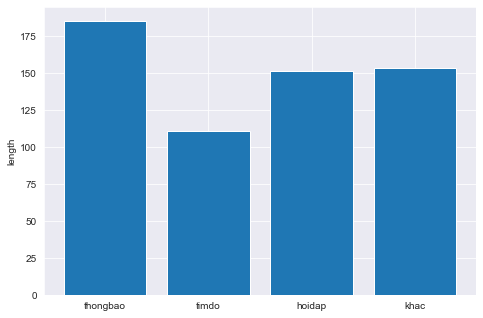

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
topic = ['thongbao', 'timdo', 'hoidap', 'khac']
mean_length = [thongbao["length"].mean(),timdo["length"].mean(),hoidap["length"].mean(),khac["length"].mean()]
plt.bar(topic, mean_length)
plt.ylabel("length")
plt.show()

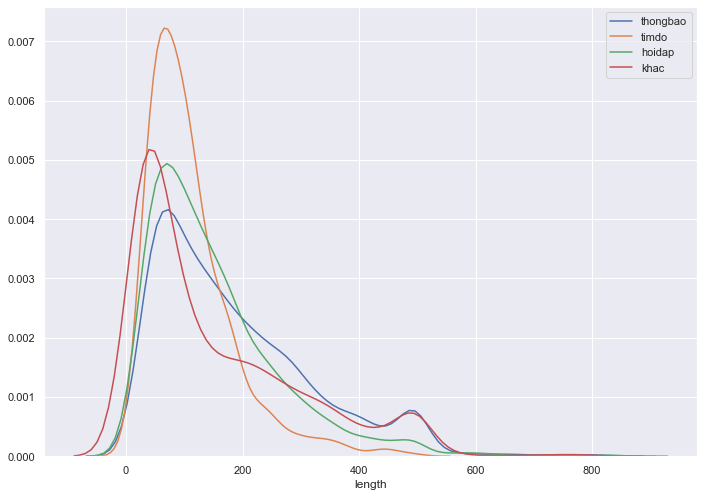

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(thongbao.length, hist=False, label="thongbao")
sns.distplot(timdo.length, hist=False, label="timdo")
sns.distplot(hoidap.length, hist=False, label="hoidap")
sns.distplot(khac.length, hist=False, label="khac")
plt.legend()

# 2. Extracting features

## 2.1. Preprocessing

In [16]:
abbr_dict={
    "ko":"không",
    "hok":"không",
    "hông":"không",
    "mn":"bạn",
    "ae":"bạn",
    "bợn":"bạn",
    "vs":"với",
    "sr":"xin lỗi",
    "help":"giúp",
    "thank":"cảm ơn",
    "thanks":"cảm ơn",
    "cám ơn":"cảm ơn",
    "tks":"cảm ơn",
    "kq":"kết quả",
    "kqua":"kết quả",
    "nhe":"nhé",
    "nhá":"nhé",
    "nha":"nhé",
    "h":"giờ",
    "s":"sao",
    "pls":"",
    "plz":"",
    "me":"mình",
    "mị":"mình",
    "đc":"được",
    "dc":"được",
    "tgian": "thời gian"
}

In [17]:
def replace_abbr(t):
    if t in abbr_dict:
        return abbr_dict[t]
    else:
        return t

In [18]:
def removeConsecutiveDuplicates(S): 
    S = list(S.rstrip()) 
    
    n = len(S)  
    
    if (n < 2) : 
        return S[0]
           
    j = 0
       
    for i in range(n):  
        if (S[j] != S[i]): 
            j += 1
            S[j] = S[i]  
      
    j += 1
    S = S[:j]
    return "".join(S)

In [19]:
def preprocessing(s, show_stepbystep=False):
    if show_stepbystep:
        print("original:")
        print(s)
        print()
    
    # remove 'Xem thêm'
    s = re.sub('Xem thêm', '', s)
    if show_stepbystep:
        print("remove 'Xem thêm':")
        print(s)
        print()

    # convert to lower case
    s = s.lower()
    if show_stepbystep:
        print("lowercase:")
        print(s)
        print()
    
    # normalize Vietnamese
    s = nm.ASRNormalize(s)
    if show_stepbystep:
        print("normalized Vietnamese:")
        print(s)
        print()
    
    # abbreviate some names
    s = re.sub('kỹ thuật phần mềm', 'ktpm', s)
    s = re.sub('công nghệ phần mềm', 'cnpm', s)
    s = re.sub('khoa học máy tính', 'khmt', s)
    s = re.sub('hệ thống thông tin', 'httt', s)
    s = re.sub('kỹ thuật máy tính', 'ktmt', s)
    s = re.sub('thương mại điện tử', 'tmđt', s)
    s = re.sub('công nghệ thông tin', 'cntt', s)
    s = re.sub('an toàn thông tin', 'attt', s)
    s = re.sub('công tác sinh viên', 'ctsv', s)
    s = re.sub('ban học tập', 'bht', s)
    if show_stepbystep:
        print("abbreviate faculty name:")
        print(s)
        print()
    
    # remove urls and hashtags
    s = re.sub(r'http\S+', '', s)
    s = re.sub(r'#\S+', '', s)
    if show_stepbystep:
        print('remove urls and hashtags:')
        print(s)
        print()
    
    # remove email address
    s = re.sub(r'\S*@\S*\s?', '', s)
    if show_stepbystep:
        print('remove email addresses:')
        print(s)
        print()
    
    # split into words
    tokens = word_tokenize(s)
    if show_stepbystep:
        print('tokenize:')
        print(tokens)
        print()
    
    # remove punctuation and number
    words = [word for word in tokens if re.sub(r"\s+", "", word).isalpha()]
    if show_stepbystep:
        print('remove punctuation:')
        print(words)
        print()
    
    # remove consecutive duplicates character
    words = [removeConsecutiveDuplicates(word) for word in words]
    if show_stepbystep:
        print('remove consecutive duplicates character:')
        print(words)
        print()
    
    # replace abbreviation of word
    words = [replace_abbr(word) for word in words]
    if show_stepbystep:
        print('replace abbreviation:')
        print(words)
        print()
        
    # replace " " with "_"
    words = [re.sub(r"\s+", "_", word) for word in words]
    if show_stepbystep:
        print('replace space with "_" :')
        print(words)
        print()
    
    # remove single character
    words = [word for word in words if len(word)>1]
    if show_stepbystep:
        print('remove single character:')
        print(words)
        print()
    
    return ' '.join(words)

In [20]:
preprocessing(dataset.iloc[3]['text'], show_stepbystep=True)

original:
🔬 Các chuyên ngành đào tạo trường Đại học Kansai tại Osaka
💰 Học phí và học bổng
❓ Điều kiện tuyển sinh trường Đại học Kansai tại Osaka
💯 Tất cả thông tin trên xem chi tiết tại link: https://echigo.edu.vn/gioi-thieu-doi-net-ve-truong-dai-hoc…/...
Xem thêm

remove 'Xem thêm':
🔬 Các chuyên ngành đào tạo trường Đại học Kansai tại Osaka
💰 Học phí và học bổng
❓ Điều kiện tuyển sinh trường Đại học Kansai tại Osaka
💯 Tất cả thông tin trên xem chi tiết tại link: https://echigo.edu.vn/gioi-thieu-doi-net-ve-truong-dai-hoc…/...


lowercase:
🔬 các chuyên ngành đào tạo trường đại học kansai tại osaka
💰 học phí và học bổng
❓ điều kiện tuyển sinh trường đại học kansai tại osaka
💯 tất cả thông tin trên xem chi tiết tại link: https://echigo.edu.vn/gioi-thieu-doi-net-ve-truong-dai-hoc…/...


normalized Vietnamese:
🔬 các chuyên ngành đào tạo trường đại học kansai tại osaka
💰 học phí và học bổng
❓ điều kiện tuyển sinh trường đại học kansai tại osaka
💯 tất cả thông tin trên xem chi tiết tại link:

'các chuyên_ngành đào_tạo trường đại_học kansai tại osaka học_phí và học_bổng điều_kiện tuyển_sinh trường đại_học kansai tại osaka tất_cả thông_tin trên xem chi_tiết tại link'

In [21]:
preprocessing(dataset.iloc[46]['text'], show_stepbystep=True)

original:
Chào tất cả các bạn,
Căn cứ thông báo của phòng Đào tạo Đại học, bắt đầu từ 09/3/2020 đến 31/03/2020 tất cả sinh viên Trường sẽ học online. Đề nghị sinh viên nghiêm túc thực hiện thông báo ở https://daa.uit.edu.vn/…/thong-bao-khan-dieu-chinh-ke-hoach…
Phần mềm:...
Xem thêm

remove 'Xem thêm':
Chào tất cả các bạn,
Căn cứ thông báo của phòng Đào tạo Đại học, bắt đầu từ 09/3/2020 đến 31/03/2020 tất cả sinh viên Trường sẽ học online. Đề nghị sinh viên nghiêm túc thực hiện thông báo ở https://daa.uit.edu.vn/…/thong-bao-khan-dieu-chinh-ke-hoach…
Phần mềm:...


lowercase:
chào tất cả các bạn,
căn cứ thông báo của phòng đào tạo đại học, bắt đầu từ 09/3/2020 đến 31/03/2020 tất cả sinh viên trường sẽ học online. đề nghị sinh viên nghiêm túc thực hiện thông báo ở https://daa.uit.edu.vn/…/thong-bao-khan-dieu-chinh-ke-hoach…
phần mềm:...


normalized Vietnamese:
chào tất cả các bạn,
căn cứ thông báo của phòng đào tạo đại học, bắt đầu từ 09/3/2020 đến 31/03/2020 tất cả sinh viên trường sẽ 

'chào tất_cả các bạn căn_cứ thông_báo của phòng đào_tạo đại_học bắt_đầu từ đến tất_cả sinh_viên trường sẽ học online đề_nghị sinh_viên nghiêm_túc thực_hiện thông_báo phần_mềm'

In [22]:
preprocessing(dataset.iloc[2704]['text'], show_stepbystep=True)

original:
♥♥♥♥♥♥[Chu Mi NGAAAAAAAAAAAAAAA]♥♥♥♥♥
Chuyện là nhóm mình có làm đồ án KNNN á :((
Ai rảnh rối click vào Khảo Sát hộ mị đc hông :*

remove 'Xem thêm':
♥♥♥♥♥♥[Chu Mi NGAAAAAAAAAAAAAAA]♥♥♥♥♥
Chuyện là nhóm mình có làm đồ án KNNN á :((
Ai rảnh rối click vào Khảo Sát hộ mị đc hông :*

lowercase:
♥♥♥♥♥♥[chu mi ngaaaaaaaaaaaaaaa]♥♥♥♥♥
chuyện là nhóm mình có làm đồ án knnn á :((
ai rảnh rối click vào khảo sát hộ mị đc hông :*

normalized Vietnamese:
♥♥♥♥♥♥[chu mi ngaaaaaaaaaaaaaaa]♥♥♥♥♥
chuyện là nhóm mình có làm đồ án knnn á :((
ai rảnh rối click vào khảo sát hộ mị đc hông :*

abbreviate faculty name:
♥♥♥♥♥♥[chu mi ngaaaaaaaaaaaaaaa]♥♥♥♥♥
chuyện là nhóm mình có làm đồ án knnn á :((
ai rảnh rối click vào khảo sát hộ mị đc hông :*

remove urls and hashtags:
♥♥♥♥♥♥[chu mi ngaaaaaaaaaaaaaaa]♥♥♥♥♥
chuyện là nhóm mình có làm đồ án knnn á :((
ai rảnh rối click vào khảo sát hộ mị đc hông :*

remove email addresses:
♥♥♥♥♥♥[chu mi ngaaaaaaaaaaaaaaa]♥♥♥♥♥
chuyện là nhóm mình có làm đồ án knnn 

'chu mi nga chuyện là nhóm mình có làm đồ_án kn ai rảnh rối click vào khảo_sát hộ mình được không'

In [23]:
dataset['preprocessed'] = [preprocessing(dataset.iloc[i]['text']) for i in range(dataset.shape[0])]

In [24]:
dataset

,label,text,preprocessed
0,1,[TSSĐH]-THÔNG BÁO TỔ CHỨC LỚP ÔN TẬP CHUẨN BỊ TUYỂN SINH CHƯƠNG TRÌNH ĐÀO TẠO TRÌNH ĐỘ THẠC SĨ ĐỢT 2 NĂM 2020.\nChi tiết mời các bạn xem tại: https://sdh.uit.edu.vn/…/thong-bao-ve-viec-chuc-tap-phuc-vu…,tsđh thông_báo tổ_chức lớp ôn_tập chuẩn_bị tuyển_sinh chương_trình đào_tạo trình_độ thạc_sĩ đợt năm chi_tiết mời các bạn xem tại
1,1,"💗💗 Giao lưu cùng Nhà báo- Nhà thơ Nguyễn Phong Việt 💗💗\n🎈🎈 Phòng Công tác Sinh viên thân mời các bạn sinh viên tham dự chương trình giao lưu cùng phóng viên, nhà thơ, tác giả sách Nguyễn Phong Việt với chủ đề ""KHI BẠN HỌC MỘT NGHỀ RỒI LÀM NGHỀ MÌNH KHÔNG HỌC""",giao_lưu cùng nhà_báo nhà_thơ nguyễn_phong_việt phòng ctsv thân mời các bạn sinh_viên tham_dự chương_trình giao_lưu cùng phóng_viên nhà_thơ tác_giả sách nguyễn_phong_việt với chủ_đề khi bạn học một nghề rồi làm nghề mình không học
2,1,Phòng Công tác Sinh viên thông tin đến sinh viên về thời gian làm việc của Không gian chia sẻ như sau:\nTại Phòng Không gian chia sẻ\n- Thứ 2: từ 08:30 - 15:00...\nXem thêm,phòng ctsv thông_tin đến sinh_viên về thời_gian làm_việc của không_gian chia_sẻ như sau tại phòng không_gian chia_sẻ thứ từ
3,1,🔬 Các chuyên ngành đào tạo trường Đại học Kansai tại Osaka\n💰 Học phí và học bổng\n❓ Điều kiện tuyển sinh trường Đại học Kansai tại Osaka\n💯 Tất cả thông tin trên xem chi tiết tại link: https://echigo.edu.vn/gioi-thieu-doi-net-ve-truong-dai-hoc…/...\nXem thêm,các chuyên_ngành đào_tạo trường đại_học kansai tại osaka học_phí và học_bổng điều_kiện tuyển_sinh trường đại_học kansai tại osaka tất_cả thông_tin trên xem chi_tiết tại link
4,1,"👉 Bật mí với các bạn một chương trình vô cùng hấp dẫn sắp diễn ra, do Nhà Văn hoá Sinh viên phối hợp với Trường ĐH CNTT - ĐHQG TP.HCM tổ chức, hứa hẹn sẽ đem lại cho các bạn sinh viên một buổi tối vô cùng thoả mái sau những giờ học căng thẳng 😁😁\n🌀 Mời tất cả các bạn đến với ""Thanh âm Việt"" lúc 17h, thứ 5 ngày 18/6/2020 tại Giảng đường 1, Trường ĐH CNTT nhé!",bật_mí với các bạn một chương_trình vô_cùng hấp_dẫn sắp diễn ra do nhà_văn_hóa sinh_viên phối_hợp với trường đh cnt đhqg tổ_chức hứa_hẹn sẽ đem lại cho các bạn sinh_viên một buổi tối vô_cùng thỏa mái sau những giờ học căng_thẳng mời tất_cả các bạn đến với thanh_âm việt lúc thứ ngày tại giảng_đường trường đh cnt nhé
...,...,...,...
9089,1,Bạn này vừa đến Trường nộp Giấy kết quả thi THPT Quốc gia 2019 để xác nhận nhập học\nVà hoàn thành luôn thủ tục nhập học (nộp học phí và hồ sơ nhập học),bạn này vừa đến trường nộp giấy kết_quả thi thpt quốc_gia để xác_nhận nhập_học và hoàn_thành luôn thủ_tục nhập_học nộp học_phí và hồ_sơ nhập_học
9090,1,Các em nhỏ nhớ đi MHX2020 nha\nChị share để kiểu khai trương group mới .-.\nShare mấy group kia chán òi :>,các em nhỏ nhớ đi nhé chị share để kiểu khai_trương group mới share mấy group kia chán òi
9091,3,# chào mình đỗ ktpm clc ... bác nào chung khoa làm quen\nƠ mà cái maill edu của trường cấp k giới hạn dung lượng gg drive à.,chào mình đỗ ktpm clc bác nào chung khoa làm_quen mà cái mail edu của trường cấp giới_hạn dung_lượng drive
9092,1,"Chào các bạn, phòng Công tác Sinh viên đã đăng tải hướng dẫn dành cho Tân sinh viên Khóa 2019 tại Forum Trường. Các bạn xem tại đây nha!\nhttps://forum.uit.edu.vn/node/48?fbclid=IwAR1v5RCKNpClPA8bLxg7kquIfrtul7f4IdLA8XvO6pFBHhl4aYP79p4PFAU",chào các bạn phòng ctsv đã đăng_tải hướng_dẫn dành cho tân sinh_viên khóa tại forum trường các bạn xem tại đây nhé


In [25]:
all_text = " ".join(text for text in dataset.preprocessed)

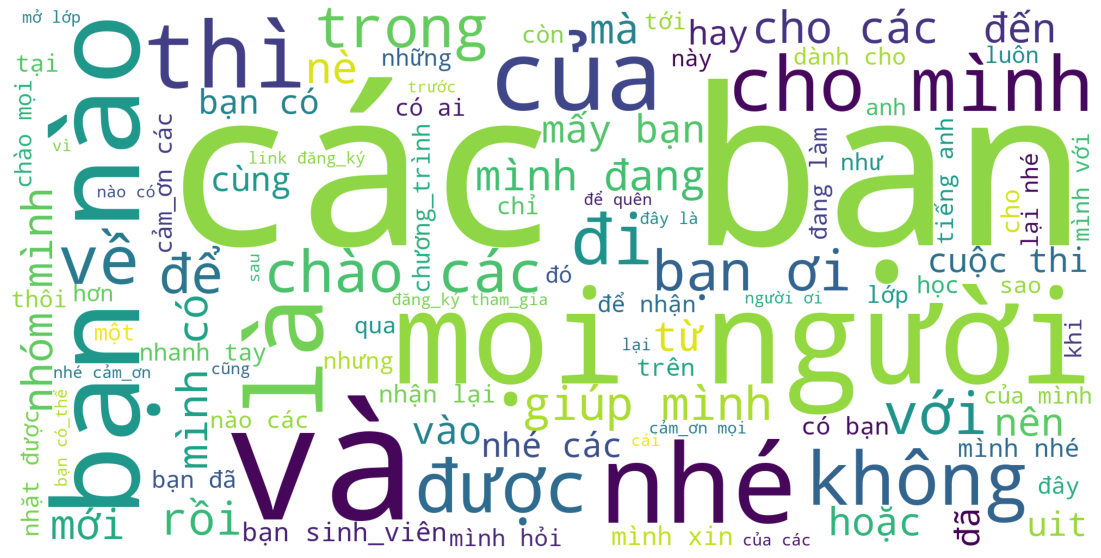

In [26]:
cloud = np.array(all_text).flatten()
plt.figure(figsize=(20,10))
word_cloud = wordcloud.WordCloud(max_words=100,background_color ="white",
                               width=2000,height=1000,mode="RGB").generate(str(cloud))
plt.axis("off")
plt.imshow(word_cloud)

## 2.2. Turn the text content into numerical feature vectors

### 2.2.1 Bag of Words

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# create the transform
bow_vectorizer = CountVectorizer()
# tokenize and build vocab
bow_vectorizer.fit(dataset['preprocessed'])
# summarize
print(bow_vectorizer.vocabulary_)
# encode document
X1 = bow_vectorizer.transform(dataset['preprocessed'])

{'tsđh': 7991, 'thông_báo': 7272, 'tổ_chức': 8341, 'lớp': 4291, 'ôn_tập': 9210, 'chuẩn_bị': 1000, 'tuyển_sinh': 8022, 'chương_trình': 1115, 'đào_tạo': 9365, 'trình_độ': 7834, 'thạc_sĩ': 7339, 'đợt': 9740, 'năm': 5487, 'chi_tiết': 905, 'mời': 4756, 'các': 1508, 'bạn': 598, 'xem': 8930, 'tại': 8218, 'giao_lưu': 2502, 'cùng': 1596, 'nhà_báo': 5175, 'nhà_thơ': 5190, 'nguyễn_phong_việt': 4971, 'phòng': 5801, 'ctsv': 1453, 'thân': 7227, 'sinh_viên': 6579, 'tham_dự': 7028, 'phóng_viên': 5815, 'tác_giả': 8067, 'sách': 6785, 'với': 8799, 'chủ_đề': 1236, 'khi': 3530, 'học': 3239, 'một': 4738, 'nghề': 4886, 'rồi': 6393, 'làm': 4050, 'mình': 4608, 'không': 3630, 'thông_tin': 7283, 'đến': 9590, 'về': 8781, 'thời_gian': 7451, 'làm_việc': 4061, 'của': 1780, 'không_gian': 3632, 'chia_sẻ': 911, 'như': 5252, 'sau': 6464, 'thứ': 7481, 'từ': 8383, 'chuyên_ngành': 985, 'trường': 7887, 'đại_học': 9504, 'kansai': 3484, 'osaka': 5643, 'học_phí': 3251, 'và': 8648, 'học_bổng': 3241, 'điều_kiện': 9300, 'tất_cả':

In [59]:
print(dataset.iloc[0]['preprocessed'])
print(X1[0])

tsđh thông_báo tổ_chức lớp ôn_tập chuẩn_bị tuyển_sinh chương_trình đào_tạo trình_độ thạc_sĩ đợt năm chi_tiết mời các bạn xem tại
  (0, 598)	1
  (0, 905)	1
  (0, 1000)	1
  (0, 1115)	1
  (0, 1508)	1
  (0, 4291)	1
  (0, 4756)	1
  (0, 5487)	1
  (0, 7272)	1
  (0, 7339)	1
  (0, 7834)	1
  (0, 7991)	1
  (0, 8022)	1
  (0, 8218)	1
  (0, 8341)	1
  (0, 8930)	1
  (0, 9210)	1
  (0, 9365)	1
  (0, 9740)	1


### 2.2.2 Tf-idf

#### Default parameters

In [60]:
tfidf_vectorizer = TfidfVectorizer()

X2 = tfidf_vectorizer.fit_transform(dataset['preprocessed'])

print(len(tfidf_vectorizer.get_feature_names()))

9893


#### Custom parameters

In [61]:
tfidf_vectorizer = TfidfVectorizer(min_df=10,max_df= 0.8,sublinear_tf=True, use_idf=True)

X3 = tfidf_vectorizer.fit_transform(dataset['preprocessed'])

print(len(tfidf_vectorizer.get_feature_names()))

1918


In [63]:
x0 = X3[0]

# place tf-idf values in a pandas data frame
df = pd.DataFrame(x0.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df = df.sort_values(by=["tfidf"],ascending=False)
df.head(20)

,tfidf
trình_độ,0.355890
tuyển_sinh,0.327182
đào_tạo,0.297437
đợt,0.279208
ôn_tập,0.275509
chuẩn_bị,0.260863
chi_tiết,0.259213
mời,0.251398
thông_báo,0.237342
tổ_chức,0.236920


In [64]:
dataset.iloc[0]['preprocessed']

'tsđh thông_báo tổ_chức lớp ôn_tập chuẩn_bị tuyển_sinh chương_trình đào_tạo trình_độ thạc_sĩ đợt năm chi_tiết mời các bạn xem tại'

### Comparing BoW and Tf-idf

In [69]:
from sklearn.linear_model import LogisticRegression

vectorizer_metric = []

def get_f1_scores(c_report):
    s = c_report.split()
    return [float(s[7]), float(s[12]), float(s[17]), float(s[22])]

def quick_train_to_choose_vectorizer(vectorizer, X, y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10,shuffle=True, stratify=y)
    
    model = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial')
    model.fit(X_train,y_train)
    
    y_pre = model.predict(X_test)
    metrics = classification_report(y_test,y_pre)
    vectorizer_metric.append(get_f1_scores(metrics))
    
    print(vectorizer)
    print('shape =', X.shape)
    print(metrics)
    print()

In [70]:
y = dataset['label']

In [71]:
quick_train_to_choose_vectorizer('BoW', X1, y)
quick_train_to_choose_vectorizer('Tf-idf (default parameters)', X2, y)
quick_train_to_choose_vectorizer('Tf-idf (custom parameters)', X3, y)

BoW
shape = (9094, 9893)
              precision    recall  f1-score   support

           1       0.84      0.84      0.84       763
           2       0.95      0.92      0.93       134
           3       0.88      0.85      0.86       488
           4       0.69      0.72      0.70       434

   micro avg       0.82      0.82      0.82      1819
   macro avg       0.84      0.83      0.83      1819
weighted avg       0.82      0.82      0.82      1819


Tf-idf (default parameters)
shape = (9094, 9893)
              precision    recall  f1-score   support

           1       0.81      0.88      0.84       763
           2       0.98      0.85      0.91       134
           3       0.88      0.84      0.86       488
           4       0.71      0.66      0.69       434

   micro avg       0.81      0.81      0.81      1819
   macro avg       0.84      0.81      0.82      1819
weighted avg       0.82      0.81      0.81      1819


Tf-idf (custom parameters)
shape = (9094, 1918)
      

In [72]:
vectorizer_metric

[[0.84, 0.93, 0.86, 0.7], [0.84, 0.91, 0.86, 0.69], [0.84, 0.93, 0.87, 0.69]]

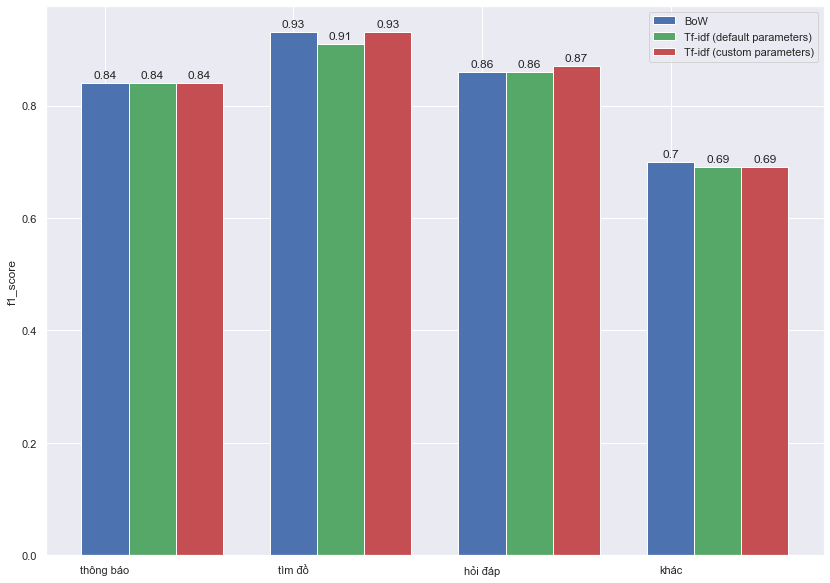

In [75]:
labels = ['thông báo', 'tìm đồ', 'hỏi đáp', 'khác']
u = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(u + 0.00, vectorizer_metric[0], color = 'b', width = 0.25, label='BoW')
rects2 = ax.bar(u + 0.25, vectorizer_metric[1], color = 'g', width = 0.25, label="Tf-idf (default parameters)")
rects3 = ax.bar(u + 0.50, vectorizer_metric[2], color = 'r', width = 0.25, label='Tf-idf (custom parameters)')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('f1_score')
# ax.set_title('Scores by group and gender')
ax.set_xticks(u)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

According to the bar chart, I **choose Tf-idf with custom parameters**.

### Final vectorizer

In [108]:
tfidf_vectorizer = TfidfVectorizer(min_df=10,max_df= 0.8, sublinear_tf=True, use_idf=True)

tfidf = tfidf_vectorizer.fit(dataset['preprocessed'])

X = tfidf_vectorizer.transform(dataset['preprocessed'])

print(len(tfidf_vectorizer.get_feature_names()))

1918


In [109]:
# save for later use
pickle.dump(tfidf, open("tfidf.pickle", "wb"))

# 3. Training the classifier

## 3.1. Splitting into training and validation sets

In [77]:
y = dataset['label']

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10,shuffle=True, stratify=y)

## 3.2. Training and choosing models

In [79]:
models_metric = []

### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=150, solver='lbfgs', multi_class='multinomial')
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
metrics = classification_report(y_test,y_pre)
models_metric.append(get_f1_scores(metrics))
print(metrics)

              precision    recall  f1-score   support

           1       0.81      0.88      0.84       763
           2       0.98      0.88      0.93       134
           3       0.87      0.86      0.87       488
           4       0.74      0.65      0.69       434

   micro avg       0.82      0.82      0.82      1819
   macro avg       0.85      0.82      0.83      1819
weighted avg       0.82      0.82      0.82      1819



### Naive Bayes classifier

In [81]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X, y)
y_pre = clf.predict(X_test)
metrics = classification_report(y_test,y_pre)
models_metric.append(get_f1_scores(metrics))
print(metrics)

              precision    recall  f1-score   support

           1       0.77      0.90      0.83       763
           2       0.99      0.90      0.95       134
           3       0.82      0.90      0.86       488
           4       0.81      0.51      0.63       434

   micro avg       0.81      0.81      0.81      1819
   macro avg       0.85      0.80      0.81      1819
weighted avg       0.81      0.81      0.80      1819



### Linear Support Vector Classification

In [82]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_train,y_train)
y_pre = lsvc.predict(X_test)
metrics = classification_report(y_test,y_pre)
models_metric.append(get_f1_scores(metrics))
print(metrics)

              precision    recall  f1-score   support

           1       0.83      0.87      0.85       763
           2       0.96      0.96      0.96       134
           3       0.86      0.86      0.86       488
           4       0.72      0.66      0.69       434

   micro avg       0.82      0.82      0.82      1819
   macro avg       0.84      0.84      0.84      1819
weighted avg       0.82      0.82      0.82      1819



In [83]:
print(models_metric)

[[0.84, 0.93, 0.87, 0.69], [0.83, 0.95, 0.86, 0.63], [0.85, 0.96, 0.86, 0.69]]


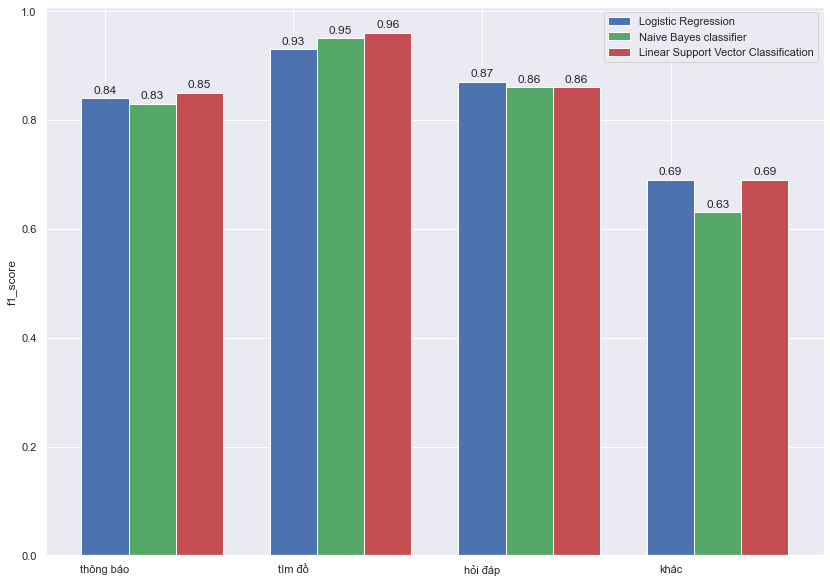

In [84]:
labels = ['thông báo', 'tìm đồ', 'hỏi đáp', 'khác']
u = np.arange(len(labels)) 

fig, ax = plt.subplots()
rects1 = ax.bar(u + 0.00, models_metric[0], color = 'b', width = 0.25, label='Logistic Regression')
rects2 = ax.bar(u + 0.25, models_metric[1], color = 'g', width = 0.25, label="Naive Bayes classifier")
rects3 = ax.bar(u + 0.50, models_metric[2], color = 'r', width = 0.25, label='Linear Support Vector Classification')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('f1_score')
# ax.set_title('Scores by group and gender')
ax.set_xticks(u)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

According to the bar chart, I **choose Linear SVC model**.

# 4. Tuning hyperparameters

## 4.1. Parameter tuning using grid search

In [118]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.01, 0.1, 1, 100, 1000]}  
  
grid = GridSearchCV(LinearSVC(), param_grid, cv=5, n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(X, y) 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [119]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 0.1}
LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [120]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           1       0.85      0.93      0.89       763
           2       0.98      0.96      0.97       134
           3       0.91      0.92      0.92       488
           4       0.84      0.71      0.77       434

   micro avg       0.88      0.88      0.88      1819
   macro avg       0.90      0.88      0.89      1819
weighted avg       0.88      0.88      0.88      1819



## 4.2. Trying different hyperparameters and plotting learning curves

Automatically created module for IPython interactive environment


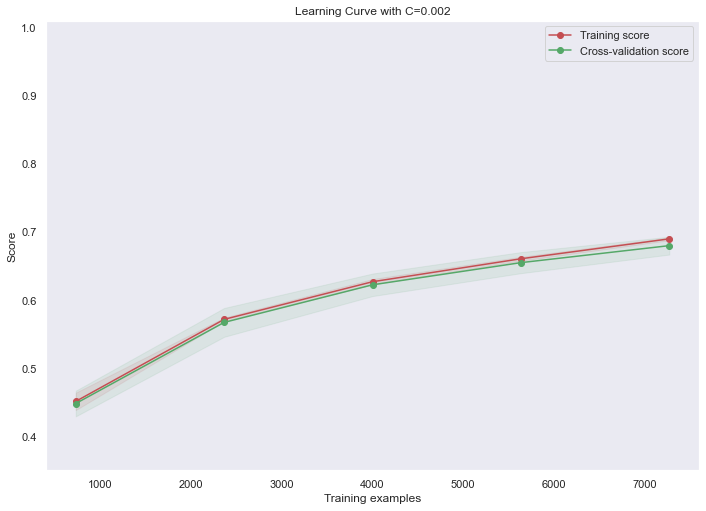

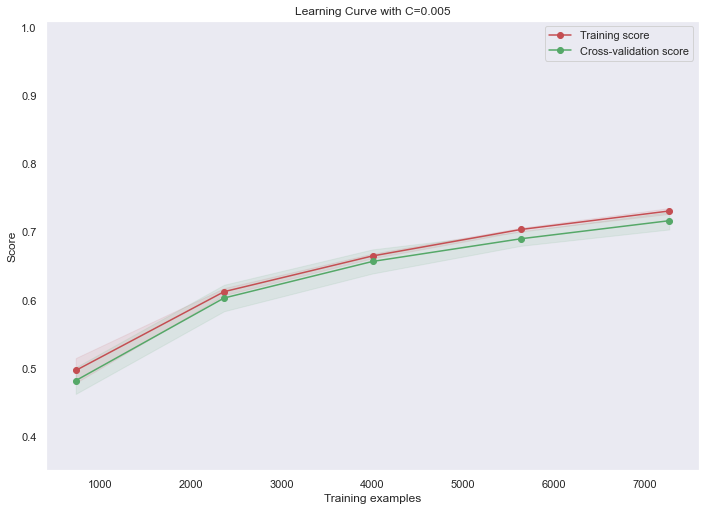

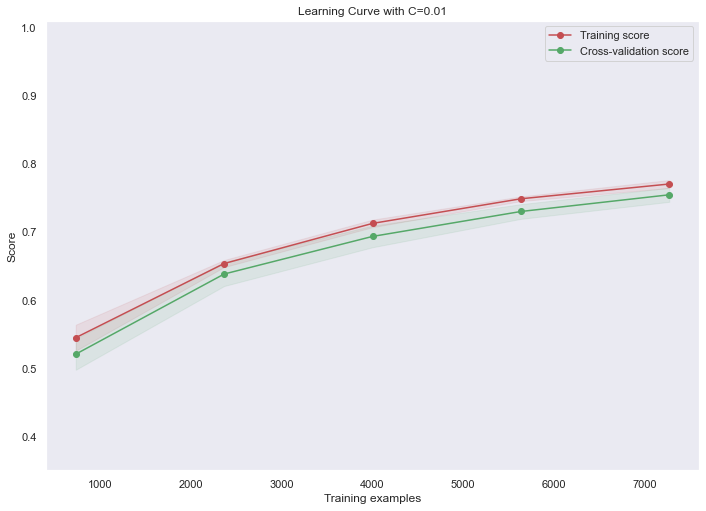

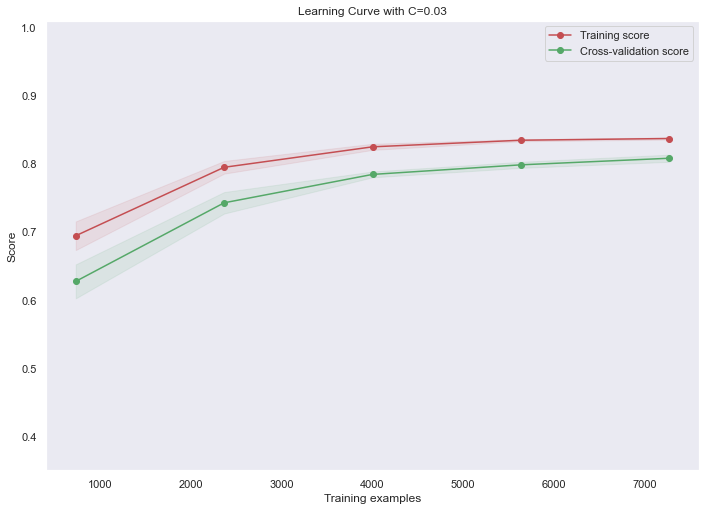

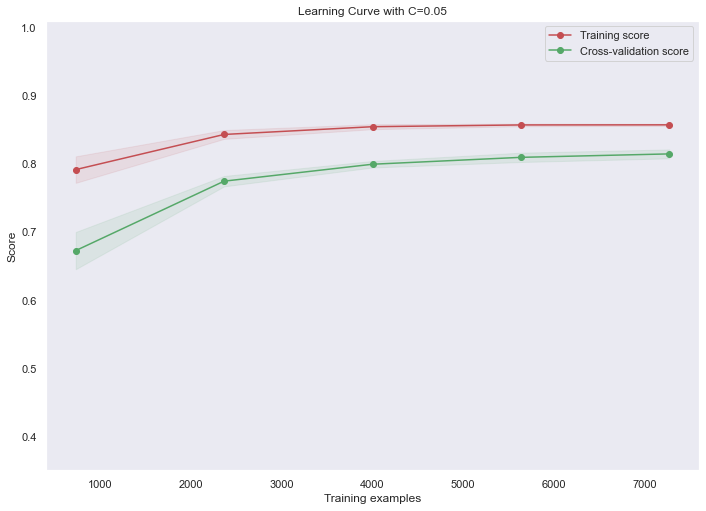

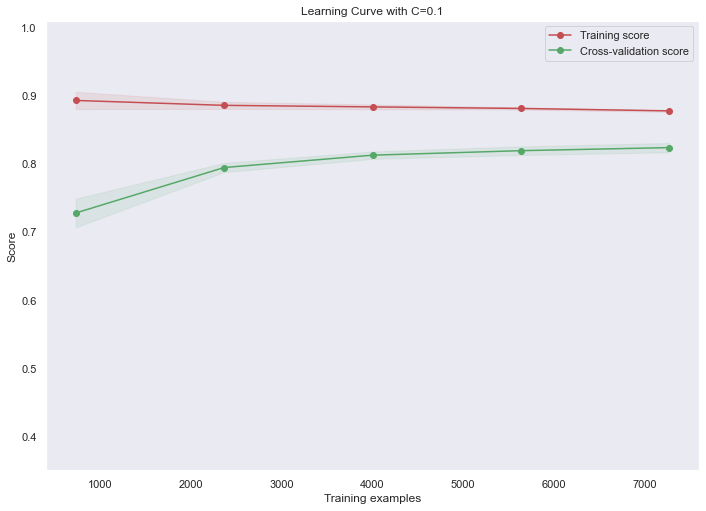

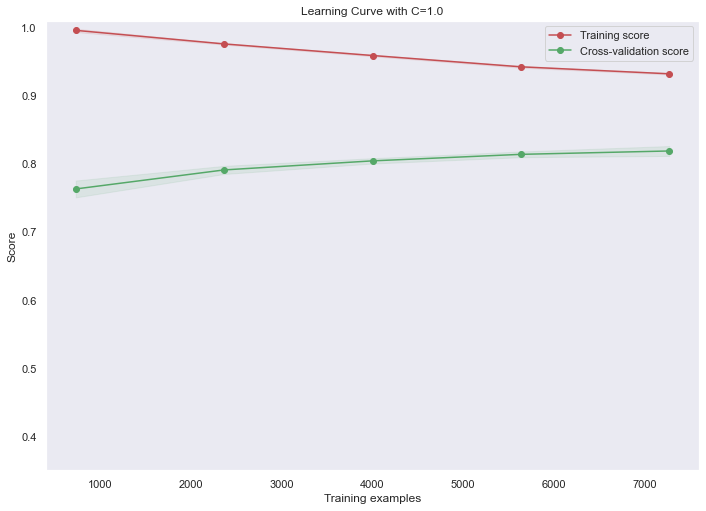

In [152]:
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curve with C=0.002"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=0.005)
plot_learning_curve(estimator, title, X, y, (0.35, 1.01), cv=cv, n_jobs=4)

title = "Learning Curve with C=0.005"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=0.007)
plot_learning_curve(estimator, title, X, y, (0.35, 1.01), cv=cv, n_jobs=4)

title = "Learning Curve with C=0.01"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=0.01)
plot_learning_curve(estimator, title, X, y, (0.35, 1.01), cv=cv, n_jobs=4)

title = "Learning Curve with C=0.03"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=0.03)
plot_learning_curve(estimator, title, X, y, (0.35, 1.01), cv=cv, n_jobs=4)

title = "Learning Curve with C=0.05"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=0.05)
plot_learning_curve(estimator, title, X, y, (0.35, 1.01), cv=cv, n_jobs=4)

title = "Learning Curve with C=0.1"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=0.1)
plot_learning_curve(estimator, title, X, y, (0.35, 1.01), cv=cv, n_jobs=4)

title = "Learning Curve with C=1.0"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=1.0)
plot_learning_curve(estimator, title, X, y, (0.35, 1.01), cv=cv, n_jobs=4)

plt.show()

I choose **C=0.03**

## 4.3. Training and saving the final model

### 4.3.1. Last train with tuned hyperparameter

In [153]:
model = LinearSVC(C=0.03)
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
metrics = classification_report(y_test,y_pre)
print(metrics)

              precision    recall  f1-score   support

           1       0.76      0.91      0.83       763
           2       0.97      0.89      0.93       134
           3       0.85      0.86      0.86       488
           4       0.80      0.51      0.62       434

   micro avg       0.80      0.80      0.80      1819
   macro avg       0.84      0.79      0.81      1819
weighted avg       0.81      0.80      0.79      1819



### 4.3.1. Save the final model

In [154]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [156]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8020890599230346


In [157]:
loaded_model

LinearSVC(C=0.03, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)